In [4]:
import numpy as np
import math
import torch
import matplotlib.pyplot as plt

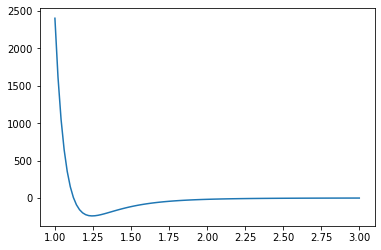

In [13]:
def e_(epsilon, sigma, r):
    return 4*(12/sigma*((sigma/r)**13) - 6/sigma*((sigma/r)**7))

epsilon = 1
sigma = 0.01
r = np.linspace(0.01, 0.03, 100)
energy = e_(epsilon, sigma, r)

plt.plot(r/sigma, energy/epsilon)